# Carregando os dados

Inicialmente, vamos carregar os dados de treino e teste.

In [1]:
import csv
import numpy as np
import pandas as pd
import sys
from sklearn.metrics import average_precision_score, precision_score, recall_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from IPython.display import Markdown
from math import sqrt
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.utils.fixes import signature

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df.describe()

train_df

,ano,sequencial_candidato,nome,uf,partido,quantidade_doacoes,quantidade_doadores,total_receita,media_receita,recursos_de_outros_candidatos.comites,...,quantidade_despesas,quantidade_fornecedores,total_despesa,media_despesa,cargo,sexo,grau,estado_civil,ocupacao,situacao
0,2006,10001,JOSÉ LUIZ NOGUEIRA DE SOUSA,AP,PT,6,6,16600.00,2766.67,0.00,...,14,14,16583.60,1184.54,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),VEREADOR,nao_eleito
1,2006,10002,LOIVA DE OLIVEIRA,RO,PT,13,13,22826.00,1755.85,6625.00,...,24,23,20325.99,846.92,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),SERVIDOR PÚBLICO ESTADUAL,nao_eleito
2,2006,10002,MARIA DALVA DE SOUZA FIGUEIREDO,AP,PT,17,16,158120.80,9301.22,2250.00,...,123,108,146011.70,1187.09,DEPUTADO FEDERAL,FEMININO,SUPERIOR COMPLETO,VIÚVO(A),PEDAGOGO,eleito
3,2006,10002,ROMALDO MILANI,MS,PRONA,6,6,3001.12,500.19,0.00,...,8,8,3001.12,375.14,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO INCOMPLETO,CASADO(A),MILITAR REFORMADO,nao_eleito
4,2006,10003,ANSELMO DE JESUS ABREU,RO,PT,48,48,119820.00,2496.25,0.00,...,133,120,116416.64,875.31,DEPUTADO FEDERAL,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),DEPUTADO,eleito
5,2006,10003,HELIO BORGES DE SOUSA ESTEVES FILHO,AP,PT,8,8,42668.26,5333.53,2250.00,...,38,37,42668.25,1122.85,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),ENGENHEIRO,nao_eleito
6,2006,10003,JOSÉ RODRIGUES DOS SANTOS NETO,PI,PCO,6,6,1771.21,295.20,0.00,...,9,9,1771.21,196.80,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,nao_eleito
7,2006,10003,JOSÉ TOMAZ DA SILVA,MS,PRONA,14,7,1231.00,87.93,0.00,...,17,10,696.91,40.99,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),MÉDICO,nao_eleito
8,2006,10003,LUIZ CARLOS MUNHOZ MEIRA,MG,PPS,2,2,70000.00,35000.00,0.00,...,332,278,66016.95,198.85,DEPUTADO FEDERAL,MASCULINO,SUPERIOR COMPLETO,CASADO(A),SERVIDOR PÚBLICO FEDERAL,nao_eleito
9,2006,10003,TADEU DE ALENCAR RIBEIRO,DF,PAN,5,3,11570.00,2314.00,0.00,...,51,33,7570.00,148.43,DEPUTADO FEDERAL,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),APOSENTADO (EXCETO SERVIDOR PÚBLICO),nao_eleito


**1) Há desbalanceamento das classes (isto é, uma classe tem muito mais instâncias que outra)? Em que proporção? Quais efeitos colaterais o desbalanceamento de classes pode causar no classificador? Como você poderia tratar isso?**

Inicialmente, vamos verificar a quantidade de ocorrências para as duas classes (eleito e não-eleito).

In [2]:
train_df.situacao.value_counts()

nao_eleito    6596
eleito        1026
Name: situacao, dtype: int64

In [3]:
qtde_eleito = train_df[train_df["situacao"]  == "eleito"].count()["situacao"]
qtde_nao_eleito = train_df[train_df["situacao"]  == "nao_eleito"].count()["situacao"]

total = qtde_eleito + qtde_nao_eleito
assert total == train_df.count()["situacao"]

perc_eleito = float(qtde_eleito) / float(total) * 100
perc_nao_eleito = float(qtde_nao_eleito) / float(total) * 100
prop_eleito_nao_eleito = float(qtde_eleito) / float(qtde_nao_eleito)
prop_nao_eleito_eleito = float(qtde_nao_eleito) / float(qtde_eleito)


Markdown("Percentual de eleitos = %.2f\n\nPercentual de nao eleitos = %.2f\n\nProporcao entre eleitos e nao eleitos (eleito : nao_eleito) = %.3f\n\nProporcao entre nao eleitos e eleitos (nao_eleito : eleito) = %.3f" % (perc_eleito, perc_nao_eleito, prop_eleito_nao_eleito, prop_nao_eleito_eleito))


Percentual de eleitos = 13.46

Percentual de nao eleitos = 86.54

Proporcao entre eleitos e nao eleitos (eleito : nao_eleito) = 0.156

Proporcao entre nao eleitos e eleitos (nao_eleito : eleito) = 6.429

R: Existe um desbalanceamento entre as classes, onde 13,46% dos dados são da classe "eleito" e 86,54% da classe "nao_eleito", ou seja, para cada não eleito temos 6,429 eleitos. O efeito colateral que o desbalanceamento de classes pode causar é o enviesamento do classificador, onde o mesmo vai ficar propenso a classificar novas instâncias como da classe majoritária. A acurácia não é uma boa métrica para medir a qualidade de um classificador baseado em dados desbalanceados, uma vez que se ele 'chuta' todas as instâncias como sendo da classe majoritária, nesse caso, por exemplo, a acurácia é de 86,54%.
Para mitigar este problema, podemos utilizar classificadores baseados em função de custo bem como utilizar técnicas para sintetização de novas instâncias da classe minoritária ou técnicas de sampling (oversamping, undersampling e hybrid sampling).

**2) Treine: um modelo de regressão logística, KNN, uma árvore de decisão e um modelo de adaboost. Tune esses modelos usando validação cruzada e controle overfitting se necessário, considerando as particularidades de cada modelo.**

Inicialmente, irei tratar o problema do desbalanceamento de classes utilizando a geração de dados sintéticos e seleção de variáveis. Foi utilizado o algoritmo Synthetic Minority Oversampling Technique (SMOTE).

In [4]:
# using SelectKBest algorithm
relevant_variables = ["quantidade_doacoes", "quantidade_doadores", "total_receita", "media_receita",
                      "recursos_de_pessoas_fisicas", "recursos_de_pessoas_juridicas", "quantidade_despesas",
                      "total_despesa", "media_despesa", "ocupacao_DEPUTADO", "ano", "situacao_eleito"]

train_relevant = train_df.drop(columns=["sequencial_candidato", "nome"])
train_relevant_encoded = pd.get_dummies(train_relevant)[relevant_variables]

relevant_variables.pop()

output_relevant = test_df.drop(columns=["sequencial_candidato", "nome"])
output_relevant_encoded = pd.get_dummies(output_relevant)[relevant_variables]
output_relevant_encoded.drop(columns=["ano"], inplace=True)

training_data = train_relevant_encoded[train_relevant_encoded["ano"] == 2006].drop(columns=["ano"])
test_data = train_relevant_encoded[train_relevant_encoded["ano"] == 2010].drop(columns=["ano"])

training_features = training_data.drop(columns=['situacao_eleito'])
training_target = training_data['situacao_eleito']
test_features = test_data.drop(columns=['situacao_eleito'])
test_target = test_data['situacao_eleito']

sm = SMOTE(ratio = 'auto')
bal_training_features, bal_training_target = sm.fit_sample(training_features, training_target)

bal_training_features = pd.DataFrame(bal_training_features)
bal_training_features.columns = training_features.columns
bal_training_target = pd.core.series.Series(bal_training_target)

bal_x_train, bal_x_val, bal_y_train, bal_y_val = train_test_split(bal_training_features, bal_training_target,
                                                  test_size = .1)

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


Os dados foram separados entre treino e teste, onde no conjunto de treino (dados de 2006) foi feito o balanceamento sintetizando dados e os dados de teste (2010) foi mantido o original. Não foi feito oversampling utilizando todo o conjunto de dados para que não fossem sintetizados dados se baseando nos dados de teste, para que não ocorra nenhum enviesamento do modelo, uma vez que o algorítmo SMOTE utiliza dados do próprio conjunto de dados para sintetizar novas entradas. O conjunto de treino com dados sintetizados foi dividido entre treino e validação.

### Treinamento de um modelo de regressão logística (sem e com validação cruzada):

In [5]:
def plot_auc(y_test, y_score, average_precision):
    precision, recall, _ = precision_recall_curve(y_test, y_score)

    # In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
    step_kwargs = ({'step': 'post'}
                   if 'step' in signature(plt.fill_between).parameters
                   else {})
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
              average_precision))

In [6]:
logisticRegr = LogisticRegression()
logisticRegr.fit(bal_x_train, bal_y_train)
logisticRegr_apr_val = average_precision_score(bal_y_val, logisticRegr.decision_function(bal_x_val))
logisticRegr_apr_test = average_precision_score(test_target, logisticRegr.decision_function(test_features))

print '- Modelo de regressão logística:'
print '\nResultados da validação: \nAccuracy = %f\nPrecision = %f\nRecall = %f' % (logisticRegr.score(bal_x_val, bal_y_val), precision_score(bal_y_val, logisticRegr.predict(bal_x_val)), recall_score(bal_y_val, logisticRegr.predict(bal_x_val)))
print 'Score médio de precision-recall de validação: {0:0.2f}'.format(logisticRegr_apr_val)
print '\nResultados de teste: \nAccuracy = %f\nPrecision = %f\nRecall = %f' % (logisticRegr.score(test_features, test_target), precision_score(test_target, logisticRegr.predict(test_features)), recall_score(test_target, logisticRegr.predict(test_features)))
print 'Score médio de precision-recall de teste: {0:0.2f}'.format(logisticRegr_apr_test)


/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- Modelo de regressão logística:

Resultados da validação: 
Accuracy = 0.927577
Precision = 0.821429
Recall = 0.522727
Score médio de precision-recall de validação: 0.76

Resultados de teste: 
Accuracy = 0.917100
Precision = 0.640379
Recall = 0.791423
Score médio de precision-recall de teste: 0.73


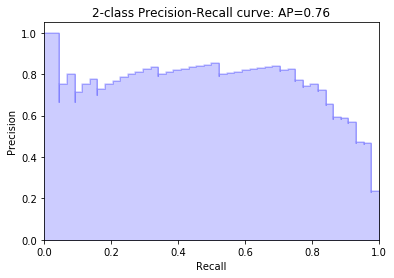

In [7]:
plot_auc(bal_y_val,logisticRegr.decision_function(bal_x_val), logisticRegr_apr_val)

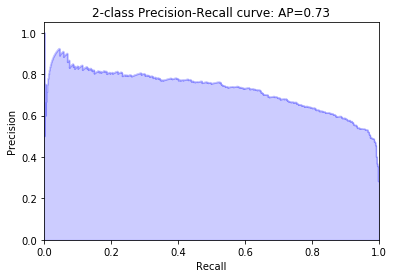

In [8]:
plot_auc(test_target, logisticRegr.decision_function(test_features), logisticRegr_apr_test)

In [9]:
logisticRegrCV = LogisticRegressionCV(cv=50)
logisticRegrCV.fit(bal_x_train, bal_y_train)
logisticRegrCV_apr_val = average_precision_score(bal_y_val, logisticRegrCV.decision_function(bal_x_val))
logisticRegrCV_apr_test = average_precision_score(test_target, logisticRegrCV.decision_function(test_features))

print '\n\n- Modelo de regressão logística com Cross Validation:'
print '\nResultados da validação: \nAccuracy = %f\nPrecision = %f\nRecall = %f' % (logisticRegrCV.score(bal_x_val, bal_y_val), precision_score(bal_y_val, logisticRegrCV.predict(bal_x_val)), recall_score(bal_y_val, logisticRegrCV.predict(bal_x_val)))
print 'Score médio de precision-recall de validação: {0:0.2f}'.format(logisticRegrCV_apr_val)
print '\nResultados de teste: \nAccuracy = %f\nPrecision = %f\nRecall = %f' % (logisticRegrCV.score(test_features, test_target), precision_score(test_target, logisticRegrCV.predict(test_features)), recall_score(test_target, logisticRegrCV.predict(test_features)))
print 'Score médio de precision-recall de teste: {0:0.2f}'.format(logisticRegrCV_apr_test)

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)




- Modelo de regressão logística com Cross Validation:

Resultados da validação: 
Accuracy = 0.913649
Precision = 0.696970
Recall = 0.522727
Score médio de precision-recall de validação: 0.50

Resultados de teste: 
Accuracy = 0.903489
Precision = 0.603710
Recall = 0.697856
Score médio de precision-recall de teste: 0.58


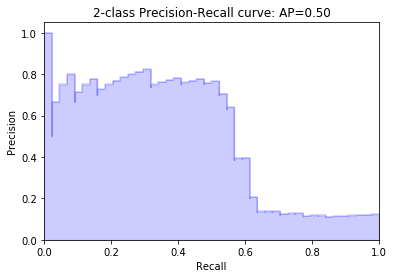

In [10]:
plot_auc(bal_y_val,logisticRegrCV.decision_function(bal_x_val), logisticRegrCV_apr_val)

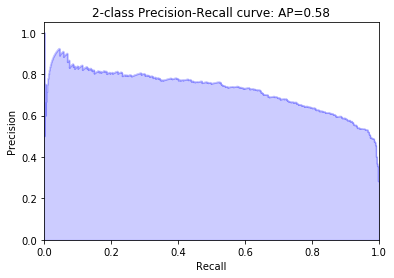

In [11]:
plot_auc(test_target, logisticRegr.decision_function(test_features), logisticRegrCV_apr_test)

### Treinamento de um modelo de regressão não paramétrico K-NN:

In [12]:
def rmse_cv(model, matrix, target):
    rmse = np.sqrt(-cross_val_score(model, matrix, target, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def calculate_knn(matrix, target, label):
    lower_rmse = sys.float_info.max
    best_model = None
    rmse_val = [] #to store rmse values for different k
    
    for K in range(100):
        K = K+1
        model = KNeighborsRegressor(n_neighbors = K)
        model.fit(matrix, target)  #fit the model

        errors = rmse_cv(model, matrix, target)
        rmse_val.append(errors.mean()) #store rmse values
        if lower_rmse > errors.mean():
            lower_rmse = errors.mean()
            best_model = model

    return (rmse_val, best_model)

rmse_knn = calculate_knn(bal_x_train, bal_y_train, "Treino")

knn_model = rmse_knn[1]

print '- Modelo de regressão regressão não paramétrico K-NN:'
predicao_valid = knn_model.predict(bal_x_val)
predicao_valid[predicao_valid == 0.5] = 0

predicao_test = knn_model.predict(test_features)
predicao_test[predicao_test == 0.5] = 0

print '\nResultados da validação: \nScore = %f' % (knn_model.score(bal_x_val, bal_y_val))
print '\nResultados de teste: \nScore = %f' % (knn_model.score(test_features, test_target))

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is 

- Modelo de regressão regressão não paramétrico K-NN:

Resultados da validação: 
Score = 0.520633

Resultados de teste: 
Score = 0.430906


### Treinamento de uma Árvore de Decisão

In [13]:
dt_clf = DecisionTreeClassifier()

dt_clf.fit(bal_x_train, bal_y_train)
dt_clf_apr_val = average_precision_score(bal_y_val, dt_clf.predict(bal_x_val))
dt_clf_apr_test = average_precision_score(test_target, dt_clf.predict(test_features))

print '- Modelo de árvore de decisão:'
print '\nResultados da validação: \nAccuracy = %f\nPrecision = %f\nRecall = %f' % (dt_clf.score(bal_x_val, bal_y_val), precision_score(bal_y_val, dt_clf.predict(bal_x_val)), recall_score(bal_y_val, dt_clf.predict(bal_x_val)))
print 'Score médio de precision-recall de validação: {0:0.2f}'.format(dt_clf_apr_val)

print '\nResultados de teste: \nAccuracy = %f\nPrecision = %f\nRecall = %f' % (dt_clf.score(test_features, test_target), precision_score(test_target, dt_clf.predict(test_features)), recall_score(test_target, dt_clf.predict(test_features)))
print 'Score médio de precision-recall de teste: {0:0.2f}'.format(dt_clf_apr_test)


- Modelo de árvore de decisão:

Resultados da validação: 
Accuracy = 0.894150
Precision = 0.565217
Recall = 0.590909
Score médio de precision-recall de validação: 0.38

Resultados de teste: 
Accuracy = 0.877753
Precision = 0.513748
Recall = 0.692008
Score médio de precision-recall de teste: 0.39


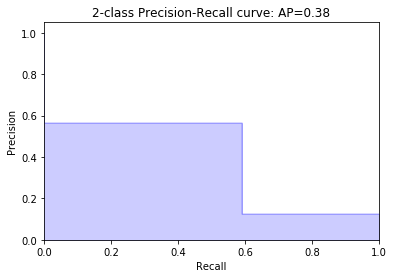

In [14]:
plot_auc(bal_y_val,dt_clf.predict(bal_x_val), dt_clf_apr_val)

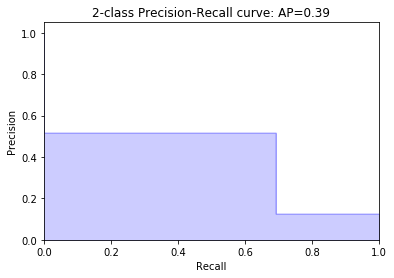

In [15]:
plot_auc(test_target, dt_clf.predict(test_features), dt_clf_apr_test)

### Treinamento de um modelo Ada Boost

In [16]:
ada_clf = AdaBoostClassifier(n_estimators=50)

ada_clf.fit(bal_x_train, bal_y_train)
ada_clf_apr_val = average_precision_score(bal_y_val, ada_clf.decision_function(bal_x_val))
ada_clf_apr_test = average_precision_score(test_target, ada_clf.decision_function(test_features))

print '- Modelo de Classificador AdaBoost:'
print '\nResultados da validação: \nAccuracy = %f\nPrecision = %f\nRecall = %f' % (ada_clf.score(bal_x_val, bal_y_val), precision_score(bal_y_val, ada_clf.predict(bal_x_val)), recall_score(bal_y_val, ada_clf.predict(bal_x_val)))
print '\nResultados de teste: \nAccuracy = %f\nPrecision = %f\nRecall = %f' % (ada_clf.score(test_features, test_target), precision_score(test_target, ada_clf.predict(test_features)), recall_score(test_target, ada_clf.predict(test_features)))

- Modelo de Classificador AdaBoost:

Resultados da validação: 
Accuracy = 0.933148
Precision = 0.738095
Recall = 0.704545

Resultados de teste: 
Accuracy = 0.906459
Precision = 0.586873
Recall = 0.888889


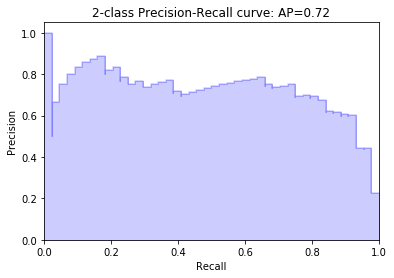

In [17]:
plot_auc(bal_y_val,ada_clf.decision_function(bal_x_val), ada_clf_apr_val)

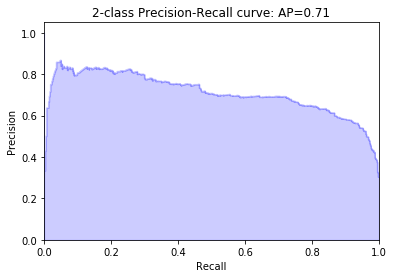

In [18]:
plot_auc(test_target, ada_clf.decision_function(test_features), ada_clf_apr_test)

### Treinamento de um classificador Random Forest

In [19]:
rf_clf = RandomForestClassifier()

rf_clf.fit(bal_x_train, bal_y_train)
rf_clf_apr_val = average_precision_score(bal_y_val, rf_clf.predict(bal_x_val))
rf_clf_apr_test = average_precision_score(test_target, rf_clf.predict(test_features))

print '- Modelo de Classificador RandomForest:'
print '\nResultados da validação: \nAccuracy = %f\nPrecision = %f\nRecall = %f' % (rf_clf.score(bal_x_val, bal_y_val), precision_score(bal_y_val, rf_clf.predict(bal_x_val)), recall_score(bal_y_val, rf_clf.predict(bal_x_val)))
print '\nResultados de teste: \nAccuracy = %f\nPrecision = %f\nRecall = %f' % (rf_clf.score(test_features, test_target), precision_score(test_target, rf_clf.predict(test_features)), recall_score(test_target, rf_clf.predict(test_features)))

- Modelo de Classificador RandomForest:

Resultados da validação: 
Accuracy = 0.924791
Precision = 0.757576
Recall = 0.568182

Resultados de teste: 
Accuracy = 0.911161
Precision = 0.609375
Recall = 0.836257


/home/ffosilva/repos/ffosilva/machine-learning-classes/atividade4/.venv/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


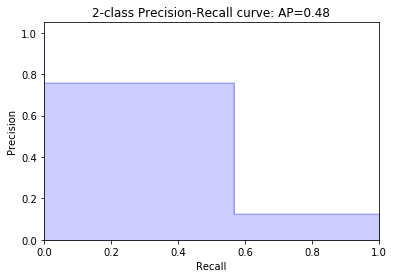

In [20]:
plot_auc(bal_y_val,rf_clf.predict(bal_x_val), rf_clf_apr_val)

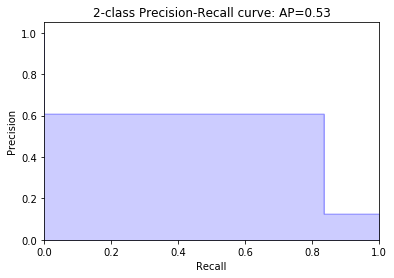

In [21]:
plot_auc(test_target,rf_clf.predict(test_features), rf_clf_apr_test)

#### 3) Reporte Precision, Recall e AUC-Precision&Recall no treino e validação. Há uma grande diferença de desempenho no treino/validação? Como você avalia os resultados? Justifique sua resposta. 

Há sim uma grande diferença entre o treino e validação. Como foi feito o processo de oversampling a partir da sintetização de dados, talvez esse processo tenha influenciado no desempenho tão inferior nos dados de teste (2010).

In [23]:
def situacao_str(sit):
    if sit == 1:
        return "eleito"
    else:
        return "nao_eleito"
    
d = {'Id': map(str, test_df["sequencial_candidato"]), 'Predicted': map(situacao_str, ada_clf.predict(output_relevant_encoded))}
pd.DataFrame(d).to_csv("output.csv", quotechar="\"", quoting=csv.QUOTE_NONNUMERIC, index=False)